In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\CAPSTONE2\complaints.csv\complaints.csv")
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-05-09,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Spring Oaks Capital, LLC",GA,30168,NaN,NaN,Web,2025-05-22,Closed with explanation,Yes,NaN,13439124
1,2025-05-11,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Resurgent Capital Services L.P.,MD,21075,NaN,NaN,Web,2025-05-22,Closed with non-monetary relief,Yes,NaN,13447616
2,2025-05-10,Prepaid card,General-purpose prepaid card,Trouble using the card,Trouble using the card to spend money in a sto...,NaN,NaN,Incomm Holdings Inc.,CA,94123,Servicemember,NaN,Web,2025-05-22,Closed with explanation,Yes,NaN,13445015
3,2025-05-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"Maximus Federal Services, Inc.",MD,20706,NaN,NaN,Web,2025-05-20,Closed with explanation,Yes,NaN,13441202
4,2025-05-10,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",PA,15237,NaN,Consent not provided,Web,2025-05-22,Closed with explanation,Yes,NaN,13446558


## DATA CLEANING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358718 entries, 0 to 9358717
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [5]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        836585
Consumer complaint narrative    6438608
Company public response         4652080
Company                               0
State                             54187
ZIP code                          30228
Tags                            8736611
Consumer consent provided?      1626008
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8590418
Complaint ID                          0
dtype: int64

In [6]:
data["Date received"] = pd.to_datetime(data["Date received"])
df_decade = data[(data["Date received"] >= "2014-01-01") & (data["Date received"] <= "2024-12-31")]
df_decade['Month'] = df_decade['Date received'].dt.month_name().str[:3]
df_decade["Year"] = df_decade["Date received"].dt.year
df_decade

C:\Users\USER\AppData\Local\Temp\ipykernel_10416\2774736348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['Month'] = df_decade['Date received'].dt.month_name().str[:3]
C:\Users\USER\AppData\Local\Temp\ipykernel_10416\2774736348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade["Year"] = df_decade["Date received"].dt.year


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Month,Year
2704,2017-01-04,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",MD,20878,Older American,Consent not provided,Web,2017-01-04,Closed with explanation,Yes,Yes,2275255,Jan,2017
2970,2015-09-11,Debt collection,Mortgage,Cont'd attempts collect debt not owed,Debt was discharged in bankruptcy,NaN,NaN,"Seterus, Inc.",AL,36804,NaN,NaN,Referral,2015-09-17,Closed with explanation,Yes,No,1561212,Sep,2015
3714,2016-02-01,Bank account or service,Savings account,Deposits and withdrawals,NaN,NaN,NaN,DISCOVER BANK,FL,32162,NaN,NaN,Referral,2016-02-04,Closed with explanation,Yes,No,1767777,Feb,2016
3822,2014-05-06,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian Information Solutions Inc.,TX,75287,NaN,NaN,Web,2014-05-08,Closed with non-monetary relief,Yes,No,840833,May,2014
4222,2014-05-27,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",OR,97233,NaN,NaN,Web,2014-05-27,Closed with explanation,Yes,No,867962,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9358713,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858,Jun,2022
9358714,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835,Jul,2016
9358715,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118,Mar,2014
9358716,2014-11-10,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",CA,95616,NaN,NaN,Postal mail,2014-11-25,Closed with explanation,Yes,No,1110751,Nov,2014


In [36]:
df_decade.shape

(2236878, 12)

In [7]:
df_decade = df_decade.drop(columns=["Sub-issue", "Consumer complaint narrative", "State", "ZIP code", "Tags", "Consumer consent provided?", "Company public response", "Complaint ID", "Consumer disputed?"])
df_decade = df_decade.drop_duplicates()
df_decade.head()

,Date received,Product,Sub-product,Issue,Company,Submitted via,Date sent to company,Company response to consumer,Timely response?,Month,Year
2704,2017-01-04,Credit reporting,NaN,Incorrect information on credit report,"EQUIFAX, INC.",Web,2017-01-04,Closed with explanation,Yes,Jan,2017
2970,2015-09-11,Debt collection,Mortgage,Cont'd attempts collect debt not owed,"Seterus, Inc.",Referral,2015-09-17,Closed with explanation,Yes,Sep,2015
3714,2016-02-01,Bank account or service,Savings account,Deposits and withdrawals,DISCOVER BANK,Referral,2016-02-04,Closed with explanation,Yes,Feb,2016
3822,2014-05-06,Credit reporting,NaN,Incorrect information on credit report,Experian Information Solutions Inc.,Web,2014-05-08,Closed with non-monetary relief,Yes,May,2014
4222,2014-05-27,Credit reporting,NaN,Incorrect information on credit report,"EQUIFAX, INC.",Web,2014-05-27,Closed with explanation,Yes,May,2014


## VISUALIZATION

In [84]:
top_companies = df_decade["Company"].value_counts().head(10)
top_methods = df_decade["Submitted via"].value_counts()
top_products = df_decade["Product"].value_counts().head(5)
top_issues = df_decade["Issue"].value_counts().head(5)

print("Top companies:", top_companies, "\n")
print("Top methods:", top_methods, "\n")
print("Top products:", top_products, "\n")
print("Top issues:", top_issues)

Top companies: Company
BANK OF AMERICA, NATIONAL ASSOCIATION     96436
WELLS FARGO & COMPANY                     92390
JPMORGAN CHASE & CO.                      90140
Experian Information Solutions Inc.       88429
TRANSUNION INTERMEDIATE HOLDINGS, INC.    78288
EQUIFAX, INC.                             78188
CITIBANK, N.A.                            77931
CAPITAL ONE FINANCIAL CORPORATION         74120
SYNCHRONY FINANCIAL                       48335
U.S. BANCORP                              33410
Name: count, dtype: int64 

Top methods: Submitted via
Web             1813869
Referral         180213
Phone            156335
Postal mail       67659
Fax               17482
Web Referral       1211
Email               109
Name: count, dtype: int64 

Top products: Product
Debt collection                                                                 574895
Credit reporting, credit repair services, or other personal consumer reports    334155
Mortgage                                          

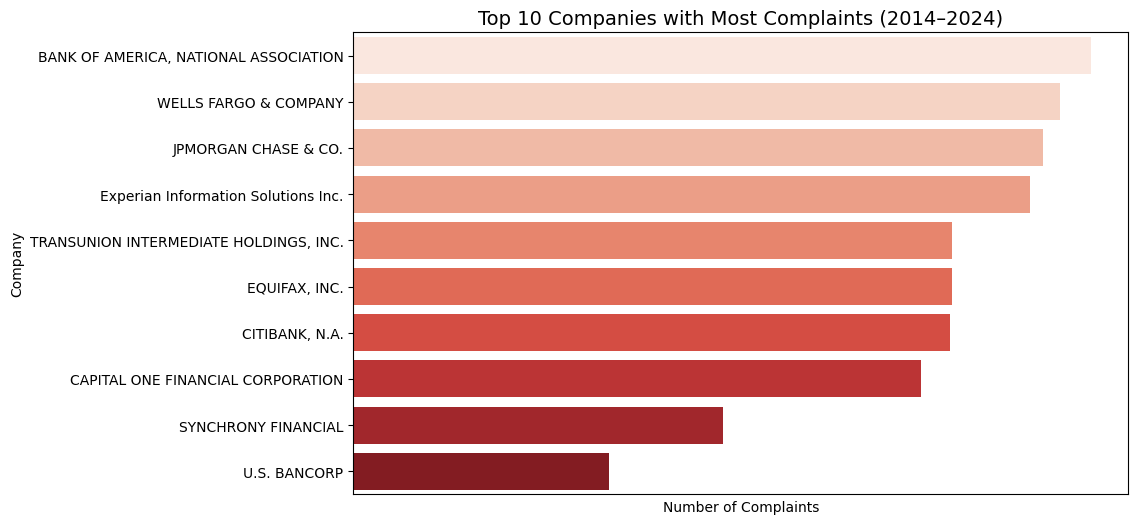

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="Reds", legend=False)
plt.title("Top 10 Companies with Most Complaints (2014–2024)", fontsize=14)
plt.xlabel("Number of Complaints")
plt.ylabel("Company")
plt.xticks([])
plt.show()

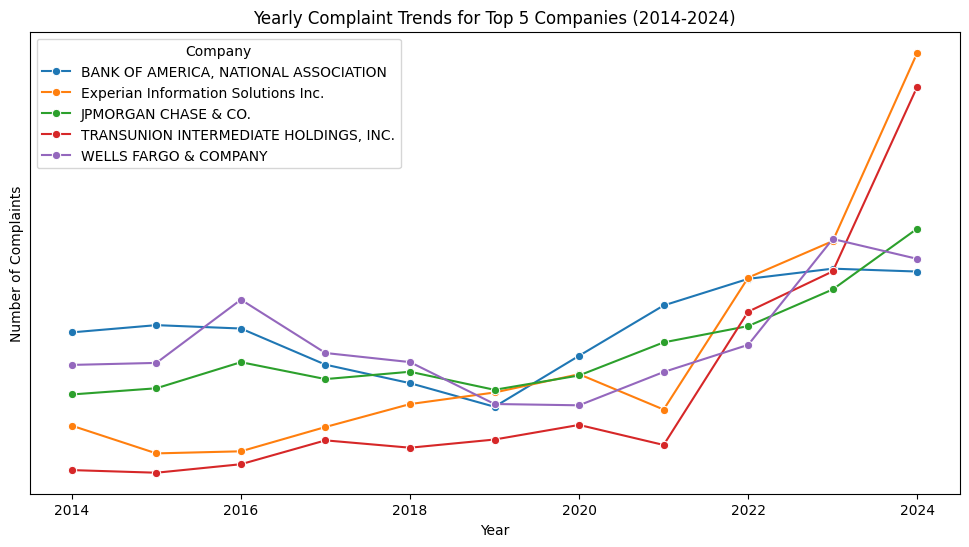

In [99]:
top_5_companies = df_decade["Company"].value_counts().head(5).index
top_5_df = df_decade[df_decade["Company"].isin(top_5_companies)]
trends = top_5_df.groupby(["Year", "Company"]).size().reset_index(name="Complaint Count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=trends, x="Year", y="Complaint Count", hue="Company", marker="o")
plt.title("Yearly Complaint Trends for Top 5 Companies (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.yticks([])
plt.show()

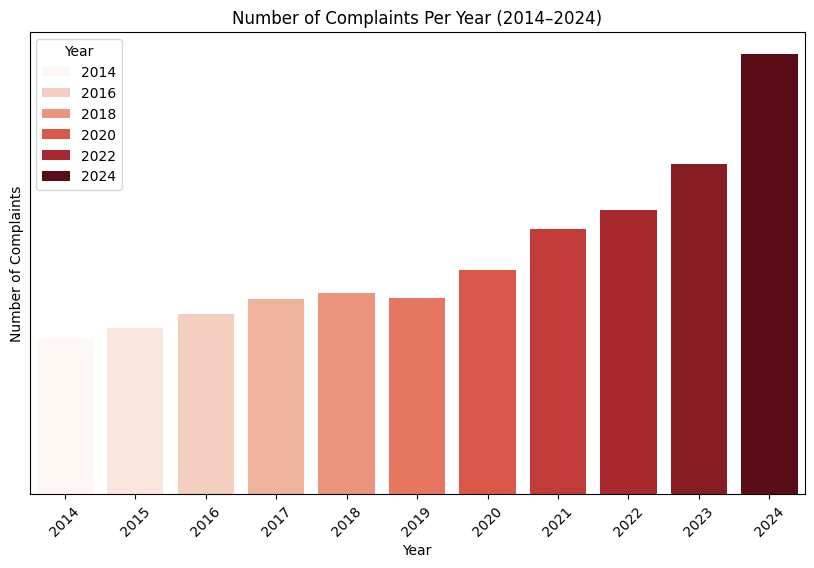

In [100]:
yearly_counts = df_decade['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, hue=yearly_counts.index, palette="Reds")
plt.title("Number of Complaints Per Year (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.yticks([])
plt.show()

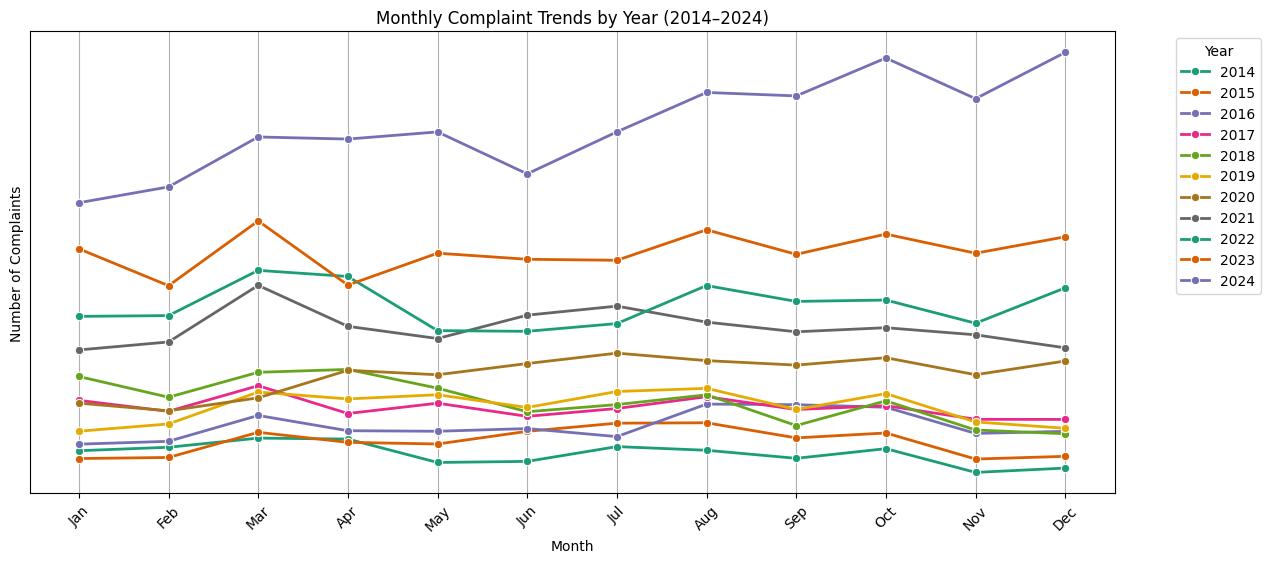

In [102]:
df_decade['Month'] = df_decade['Date received'].dt.month_name().str[:3]
monthly_trends = df_decade.groupby(['Year', 'Month']).size().reset_index(name='Complaint Count')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_trends['Month'] = pd.Categorical(monthly_trends['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Complaint Count', hue='Year', marker='o', linewidth=2, palette='Dark2')

plt.title('Monthly Complaint Trends by Year (2014–2024)')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.yticks([])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

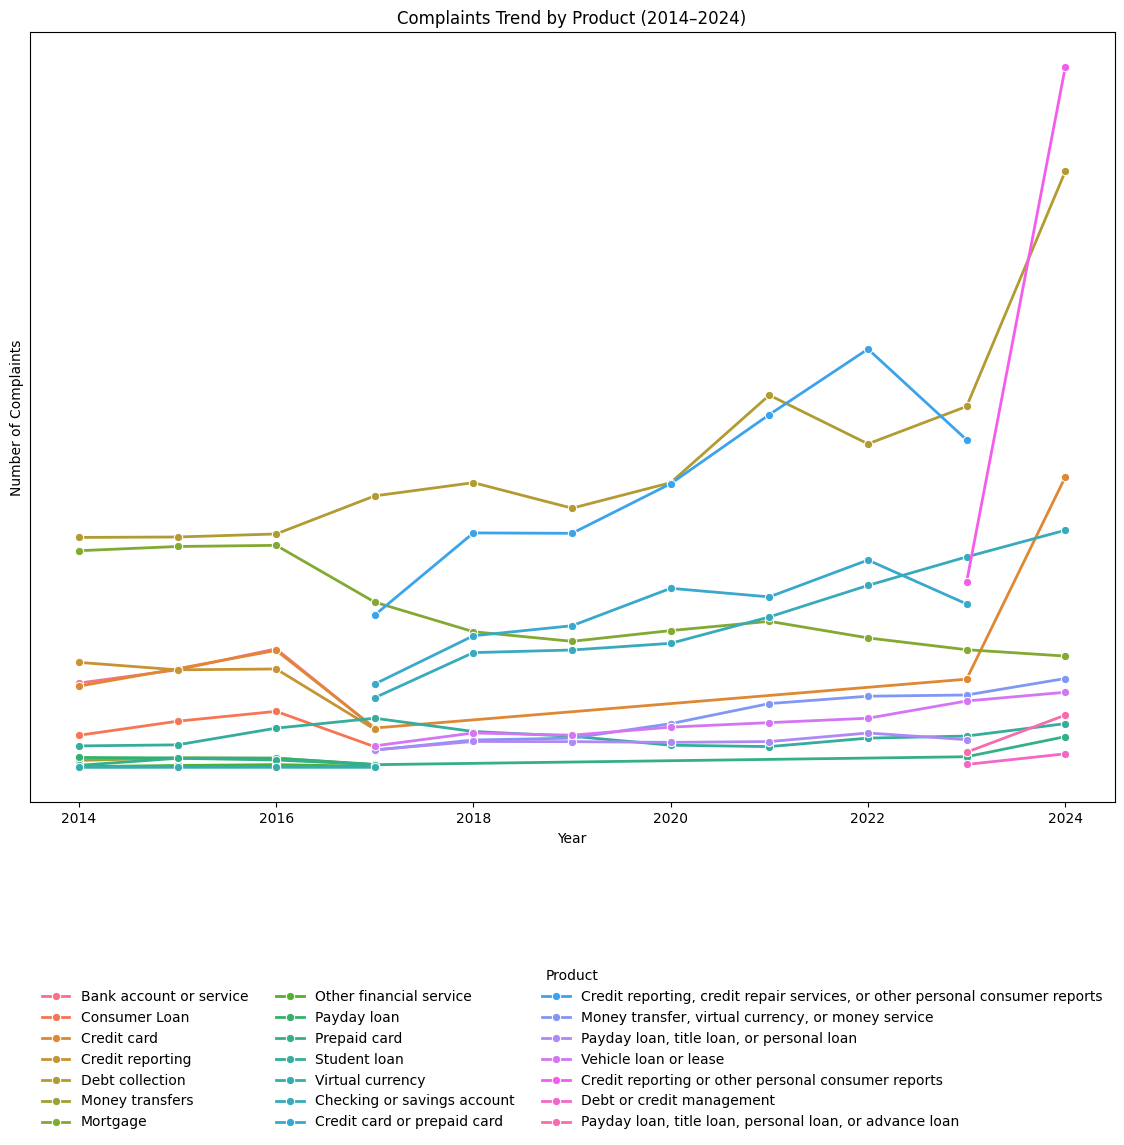

In [110]:
product_year_trend = df_decade.groupby(['Year', 'Product']).size().reset_index(name='Complaint Count')

plt.figure(figsize=(14, 10))
sns.lineplot(data=product_year_trend, x='Year', y='Complaint Count', hue='Product', marker='o', linewidth=2)
plt.title("Complaints Trend by Product (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.yticks([])
plt.legend(title='Product', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
plt.show()

<Figure size 1400x1000 with 0 Axes>

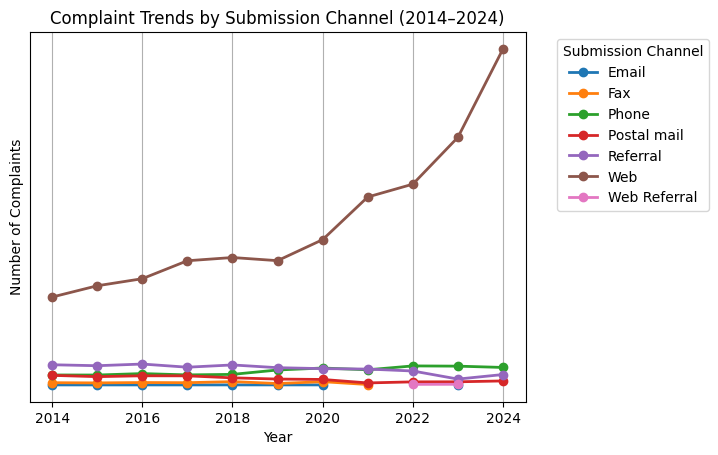

In [111]:
channel_year_trend = df_decade.groupby(['Year', 'Submitted via']).size().reset_index(name='Complaint Count')

pivot_channel_year = channel_year_trend.pivot(index='Year', columns='Submitted via', values='Complaint Count')

plt.figure(figsize=(14, 10))
pivot_channel_year.plot(marker='o', linewidth=2)
plt.title("Complaint Trends by Submission Channel (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.yticks([])
plt.grid(True)
plt.legend(title='Submission Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

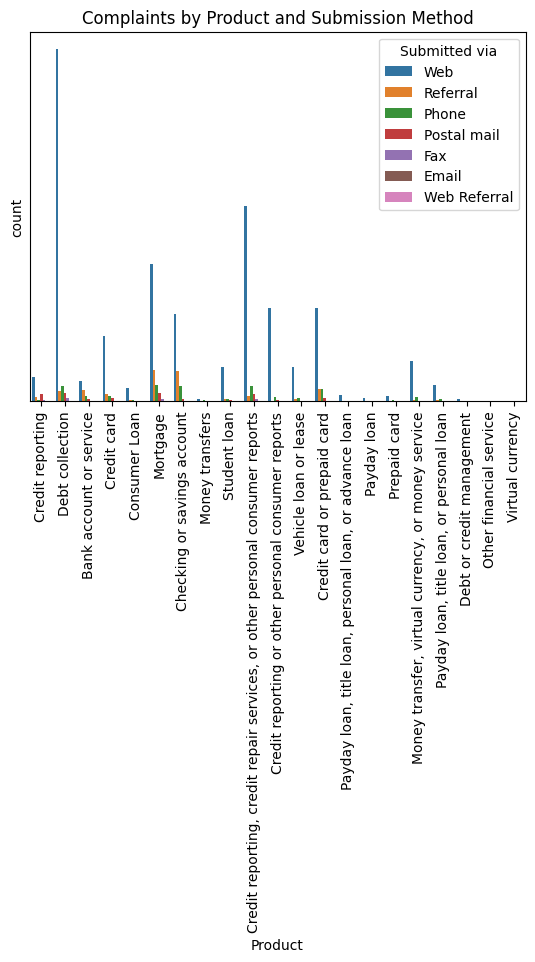

In [93]:
sns.countplot(data=df_decade, x='Product', hue='Submitted via')
plt.xticks(rotation=90)
plt.title("Complaints by Product and Submission Method")
plt.yticks([])
plt.show()

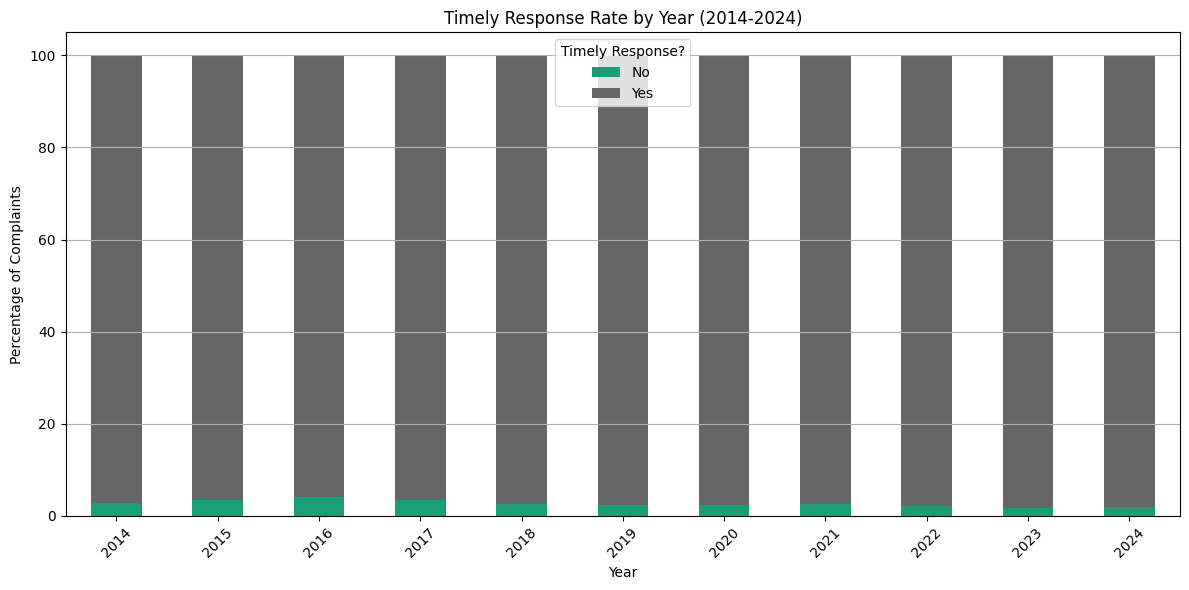

In [112]:
timely_trend = df_decade.groupby(['Year', 'Timely response?']).size().unstack()
timely_percent = timely_trend.div(timely_trend.sum(axis=1), axis=0) * 100

timely_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Dark2')
plt.title('Timely Response Rate by Year (2014-2024)')
plt.ylabel('Percentage of Complaints')
plt.xlabel('Year')
plt.legend(title='Timely Response?')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()